<a href="https://colab.research.google.com/github/akshaypat444/tensorflow_practice/blob/main/06_transfer_learning_scaling_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Vision Mini

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-03-05 03:13:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-03-05 03:13:52 (40.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Import modules and packages

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [5]:
def compare_historys(original_history, new_history, initial_epochs=5):

  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label="Training accuracy")
  plt.plot(total_val_acc, label="Val Accuracy")
  plt.plot([5-1, 5-1], plt.ylim(), label="Start fine tunning")
  plt.legend(loc="lower right")
  plt.title("Training and validation accuracy")

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss, label="Training loss")
  plt.plot(total_val_loss, label="Val loss")
  plt.plot([5-1, 5-1], plt.ylim(), label="Start fine tunning")
  plt.legend(loc="upper right")
  plt.title("Training and validation loss")


## Get the data

In [6]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

unzip_data("101_food_classes_10_percent.zip")
walk_through_dir("101_food_classes_10_percent")

--2024-03-05 03:13:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.207, 74.125.132.207, 74.125.201.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  60.7MB/s    in 16s     

2024-03-05 03:14:15 (96.4 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/chocolate_mousse'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/omelette'.
There are 0 directories and 

In [7]:
train_dir = "101_food_classes_10_percent/train"
test_dir = "101_food_classes_10_percent/test"
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)
INPUT_SHAPE = (224, 224, 3)

train_data =  tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                  image_size=IMAGE_SIZE,
                                                                  batch_size=BATCH_SIZE,
                                                                  label_mode="categorical",
                                                               )

test_data =  tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                  image_size=IMAGE_SIZE,
                                                                  batch_size=BATCH_SIZE,
                                                                  label_mode="categorical",
                                                                  shuffle=False) # Don't shuffle test data for predictions



Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


## Visualize the images

Text(0.5, 1.0, 'Original Image')

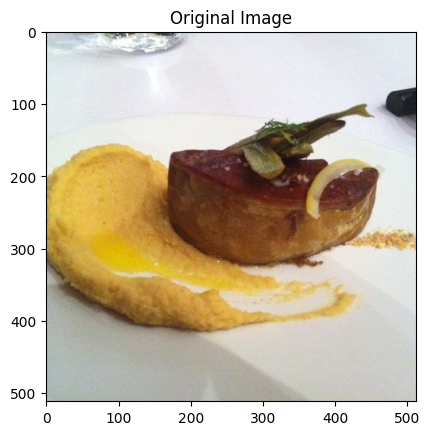

In [6]:
target_class = random.choice(train_data.class_names)
target_dir = "101_food_classes_10_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title("Original Image")

## Model 0 - 10% data of 101 classes of images

1. Create Model checkpoint
2. Create data augmentation layer
3. Build headless (no top layer) functional efficientnetb0 backboned moded.
4. Compile the mode
5. Feature extractor for 5 full passes (5 epochs on 15% of validation data)

24274472/24274472 [==============================] - 0s 0us/step
Saving TensorBoard log files to: transfer_learning/1_per_data_aug/20240305-012303
Epoch 1/5
237/237 [==============================] - 199s 796ms/step - loss: 3.5229 - accuracy: 0.2376 - val_loss: 2.7171 - val_accuracy: 0.3796
Epoch 2/5
237/237 [==============================] - 120s 504ms/step - loss: 2.4159 - accuracy: 0.4479 - val_loss: 2.2402 - val_accuracy: 0.4549
Epoch 3/5
237/237 [==============================] - 104s 441ms/step - loss: 2.0479 - accuracy: 0.5127 - val_loss: 2.0372 - val_accuracy: 0.4749
Epoch 4/5
237/237 [==============================] - 87s 367ms/step - loss: 1.8411 - accuracy: 0.5485 - val_loss: 1.9170 - val_accuracy: 0.5000
Epoch 5/5
790/790 [==============================] - 39s 49ms/step - loss: 1.6177 - accuracy: 0.5728


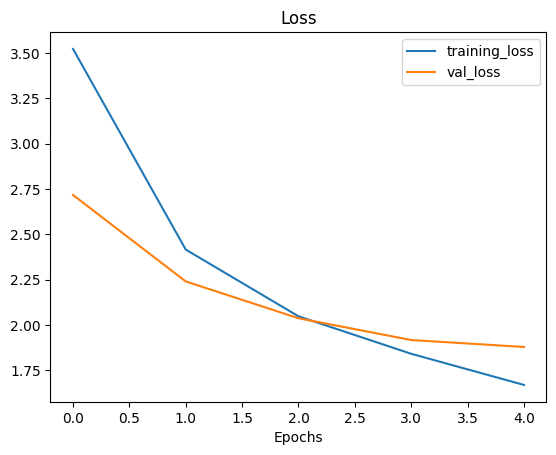

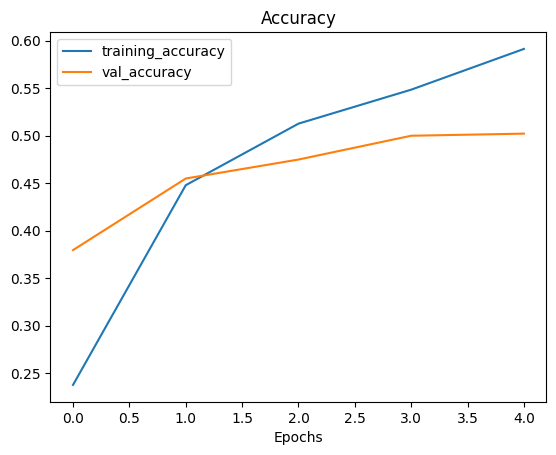

In [7]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Setup checkpointing
checkpoint_path = "101_food_classes_10_percent_data_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True,
                                                         monitor="val_accuracy",
                                                         save_best_only=True)

# Setup data augmentation
data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2)
], name="data_augmentation")

number_of_classes = len(train_data.class_names)

# Create feature extractor model (Not-fine tunned) using efficient net as a base model
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

input_layer = layers.Input(shape=INPUT_SHAPE, name="input_layer")
x = data_augmentation(input_layer)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
output_layer = layers.Dense(number_of_classes, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(input_layer, output_layer)

model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the mode
history_model_0 = model_0.fit(train_data,
                              epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=int(0.25 * len(test_data)),
                              callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                     experiment_name="1_per_data_aug"),
                                         checkpoint_callback])

# Evaluate the model on full test data
model_0.evaluate(test_data)

# Plot the training curves
plot_loss_curves(history_model_0)

## Model 1 - Fine Tunning

input_1 False
rescaling False
normalization False
stem_conv False
stem_bn False
stem_activation False
block1a_project_conv False
block1a_project_bn False
block1a_project_activation False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_project_conv False
block2b_project_bn False
block2b_drop False
block2b_add False
block3a_expand_conv False
block3a_expand_bn False
block3a_expand_activation False
block3a_project_conv False
block3a_project_bn False
block3b_expand_conv False
block3b_expand_bn False
block3b_expand_activation False
block3b_project_conv False
block3b_project_bn False
block3b_drop False
block3b_add False
block4a_expand_conv False
block4a_expand_bn False
block4a_expand_activation False
block4a_dwconv2 False
block4a_bn False
block4a_activation False
block4a_se_squeeze False
block4a_se_reshape False
block4a

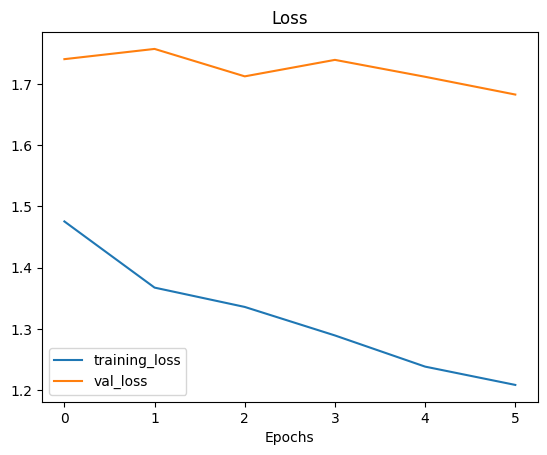

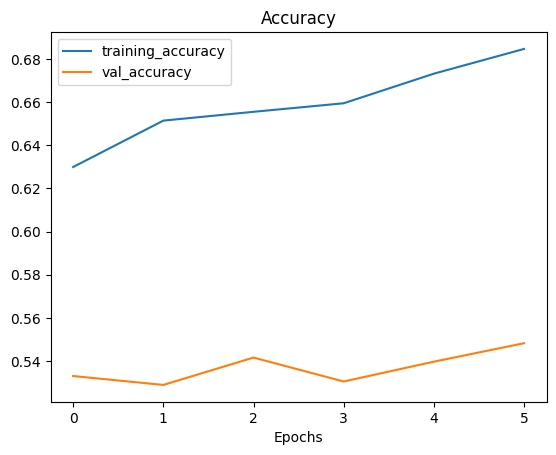

In [8]:
base_model.trainable = True

for layer in base_model.layers[:-5]:
  layer.trainable = False


# Recompile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

# Print which layers are trainable
for layer in base_model.layers:
  print(layer.name, layer.trainable)

history_model_2 = model_0.fit(train_data,
                              epochs=10,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              initial_epoch=history_model_0.epoch[-1],
                              validation_steps=int(0.25 * len(test_data)),
                              callbacks=[ checkpoint_callback])

# Evaluate the model on full test data
model_0.evaluate(test_data)

# Plot the training curves
plot_loss_curves(history_model_2)

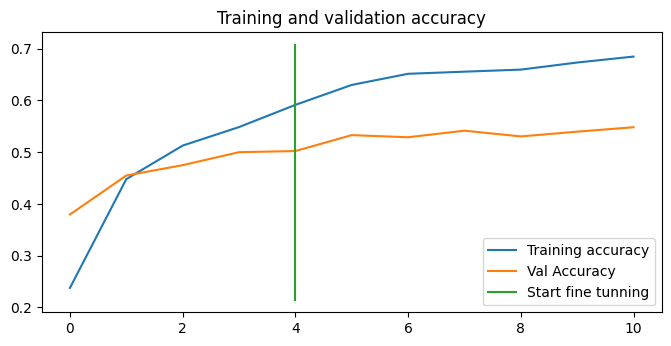

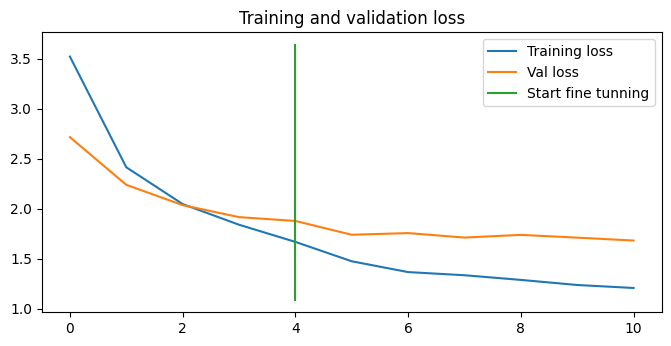

In [9]:
compare_historys(history_model_0, history_model_2)

## Saving and loading our model

**Model can be saved and later downloaded and reloaded to perform the inferences**

In [10]:
model_0.save("drive/MyDrive/101_food_classes_10_percent.model")

In [8]:
loaded_model = tf.keras.models.load_model("drive/MyDrive/101_food_classes_10_percent.model")
loaded_model.evaluate(test_data)

790/790 [==============================] - 127s 158ms/step - loss: 1.4669 - accuracy: 0.6069


[1.4668917655944824, 0.6068910956382751]

## Evaluating performance of the model

In [10]:
pred_probs = loaded_model.predict(test_data, verbose=1)
print(pred_probs.shape)

790/790 [==============================] - 130s 162ms/step
(25250, 101)


In [11]:
pred_probs[:10]

array([[2.0568215e-03, 3.4050714e-05, 1.6777852e-01, ..., 2.9397099e-06,
        1.2320203e-03, 6.0046448e-05],
       [6.7064774e-01, 4.4167089e-07, 1.1060634e-02, ..., 7.5802277e-04,
        4.7983153e-06, 7.2851311e-05],
       [2.5352308e-01, 4.2093566e-04, 1.6007427e-02, ..., 9.5483579e-04,
        7.1801635e-04, 6.2864390e-03],
       ...,
       [2.5641209e-01, 2.1918022e-06, 2.0206721e-02, ..., 5.0750491e-04,
        1.7501842e-04, 4.5758695e-04],
       [1.5457441e-01, 6.2745639e-05, 5.1162068e-02, ..., 1.2983611e-03,
        1.8369826e-04, 1.8044241e-03],
       [5.2212483e-01, 5.3473144e-07, 4.2036870e-03, ..., 1.3187276e-03,
        1.0570749e-05, 4.8931508e-04]], dtype=float32)

In [12]:
pred_probs[0].argmax()

85

In [13]:
pred_classes = pred_probs.argmax(axis=1)
pred_classes[:10]

array([85,  0,  0,  0,  8, 78, 29, 46,  9,  0])

In [14]:
# Compare predicted labels to original labels
true_classes = [ test_labels.numpy().argmax() for _, test_labels in test_data.unbatch() ]
true_classes[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [15]:
## Accuracy score
from sklearn.metrics import accuracy_score

sklearn_accuracy = accuracy_score(y_true=true_classes, y_pred=pred_classes)
print(f"accuracy = {sklearn_accuracy}")

accuracy = 0.6068910891089109


### Confusion Matrix

In [16]:
from helper_functions import make_confusion_matrix

class_names = test_data.class_names
make_confusion_matrix(y_true=true_classes,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      savefig=True)

# Modify helper functions after this to make labels verticle
# Add below code on line 96, 97
# plt.xticks(rotation=70, fontsize=text_size)
# plt.yticks(fontsize=text_size)

### Classification reports

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_true=true_classes, y_pred=pred_classes))

              precision    recall  f1-score   support

           0       0.40      0.18      0.25       250
           1       0.66      0.66      0.66       250
           2       0.63      0.50      0.56       250
           3       0.65      0.59      0.62       250
           4       0.47      0.47      0.47       250
           5       0.56      0.42      0.48       250
           6       0.77      0.76      0.77       250
           7       0.84      0.73      0.78       250
           8       0.34      0.44      0.38       250
           9       0.32      0.80      0.46       250
          10       0.61      0.44      0.52       250
          11       0.72      0.51      0.60       250
          12       0.70      0.62      0.66       250
          13       0.58      0.60      0.59       250
          14       0.48      0.60      0.53       250
          15       0.32      0.36      0.34       250
          16       0.65      0.49      0.56       250
          17       0.46    

In [29]:
classification_report_dict = classification_report(y_true=true_classes,
                                                   y_pred=pred_classes,
                                                   output_dict=True)
classification_report_dict

{'0': {'precision': 0.40350877192982454,
  'recall': 0.184,
  'f1-score': 0.25274725274725274,
  'support': 250},
 '1': {'precision': 0.656, 'recall': 0.656, 'f1-score': 0.656, 'support': 250},
 '2': {'precision': 0.628140703517588,
  'recall': 0.5,
  'f1-score': 0.556792873051225,
  'support': 250},
 '3': {'precision': 0.6475770925110133,
  'recall': 0.588,
  'f1-score': 0.6163522012578616,
  'support': 250},
 '4': {'precision': 0.4738955823293173,
  'recall': 0.472,
  'f1-score': 0.4729458917835671,
  'support': 250},
 '5': {'precision': 0.5614973262032086,
  'recall': 0.42,
  'f1-score': 0.48054919908466825,
  'support': 250},
 '6': {'precision': 0.7745901639344263,
  'recall': 0.756,
  'f1-score': 0.7651821862348178,
  'support': 250},
 '7': {'precision': 0.8394495412844036,
  'recall': 0.732,
  'f1-score': 0.782051282051282,
  'support': 250},
 '8': {'precision': 0.3394495412844037,
  'recall': 0.444,
  'f1-score': 0.3847487001733102,
  'support': 250},
 '9': {'precision': 0.32410

In [30]:
class_f1_scores = {}
for k, v in classification_report_dict.items():
  if k == "accuracy":
    break
  else:
    class_f1_scores[class_names[int(k)]] = v['f1-score']

class_f1_scores

{'apple_pie': 0.25274725274725274,
 'baby_back_ribs': 0.656,
 'baklava': 0.556792873051225,
 'beef_carpaccio': 0.6163522012578616,
 'beef_tartare': 0.4729458917835671,
 'beet_salad': 0.48054919908466825,
 'beignets': 0.7651821862348178,
 'bibimbap': 0.782051282051282,
 'bread_pudding': 0.3847487001733102,
 'breakfast_burrito': 0.46064814814814814,
 'bruschetta': 0.5150812064965197,
 'caesar_salad': 0.5981308411214953,
 'cannoli': 0.6553911205073996,
 'caprese_salad': 0.5854616895874262,
 'carrot_cake': 0.5340501792114696,
 'ceviche': 0.3377110694183865,
 'cheese_plate': 0.5583524027459954,
 'cheesecake': 0.45252525252525255,
 'chicken_curry': 0.48275862068965514,
 'chicken_quesadilla': 0.562992125984252,
 'chicken_wings': 0.7078189300411522,
 'chocolate_cake': 0.5553145336225597,
 'chocolate_mousse': 0.39453124999999994,
 'churros': 0.7256637168141593,
 'clam_chowder': 0.7452471482889734,
 'club_sandwich': 0.6413043478260869,
 'crab_cakes': 0.4397590361445783,
 'creme_brulee': 0.709129

In [31]:
# Create dataframe of f1 scores
import pandas as pd
f1_scores = pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                          "f1-scores": list(class_f1_scores.values())}).sort_values("f1-scores", ascending=False)

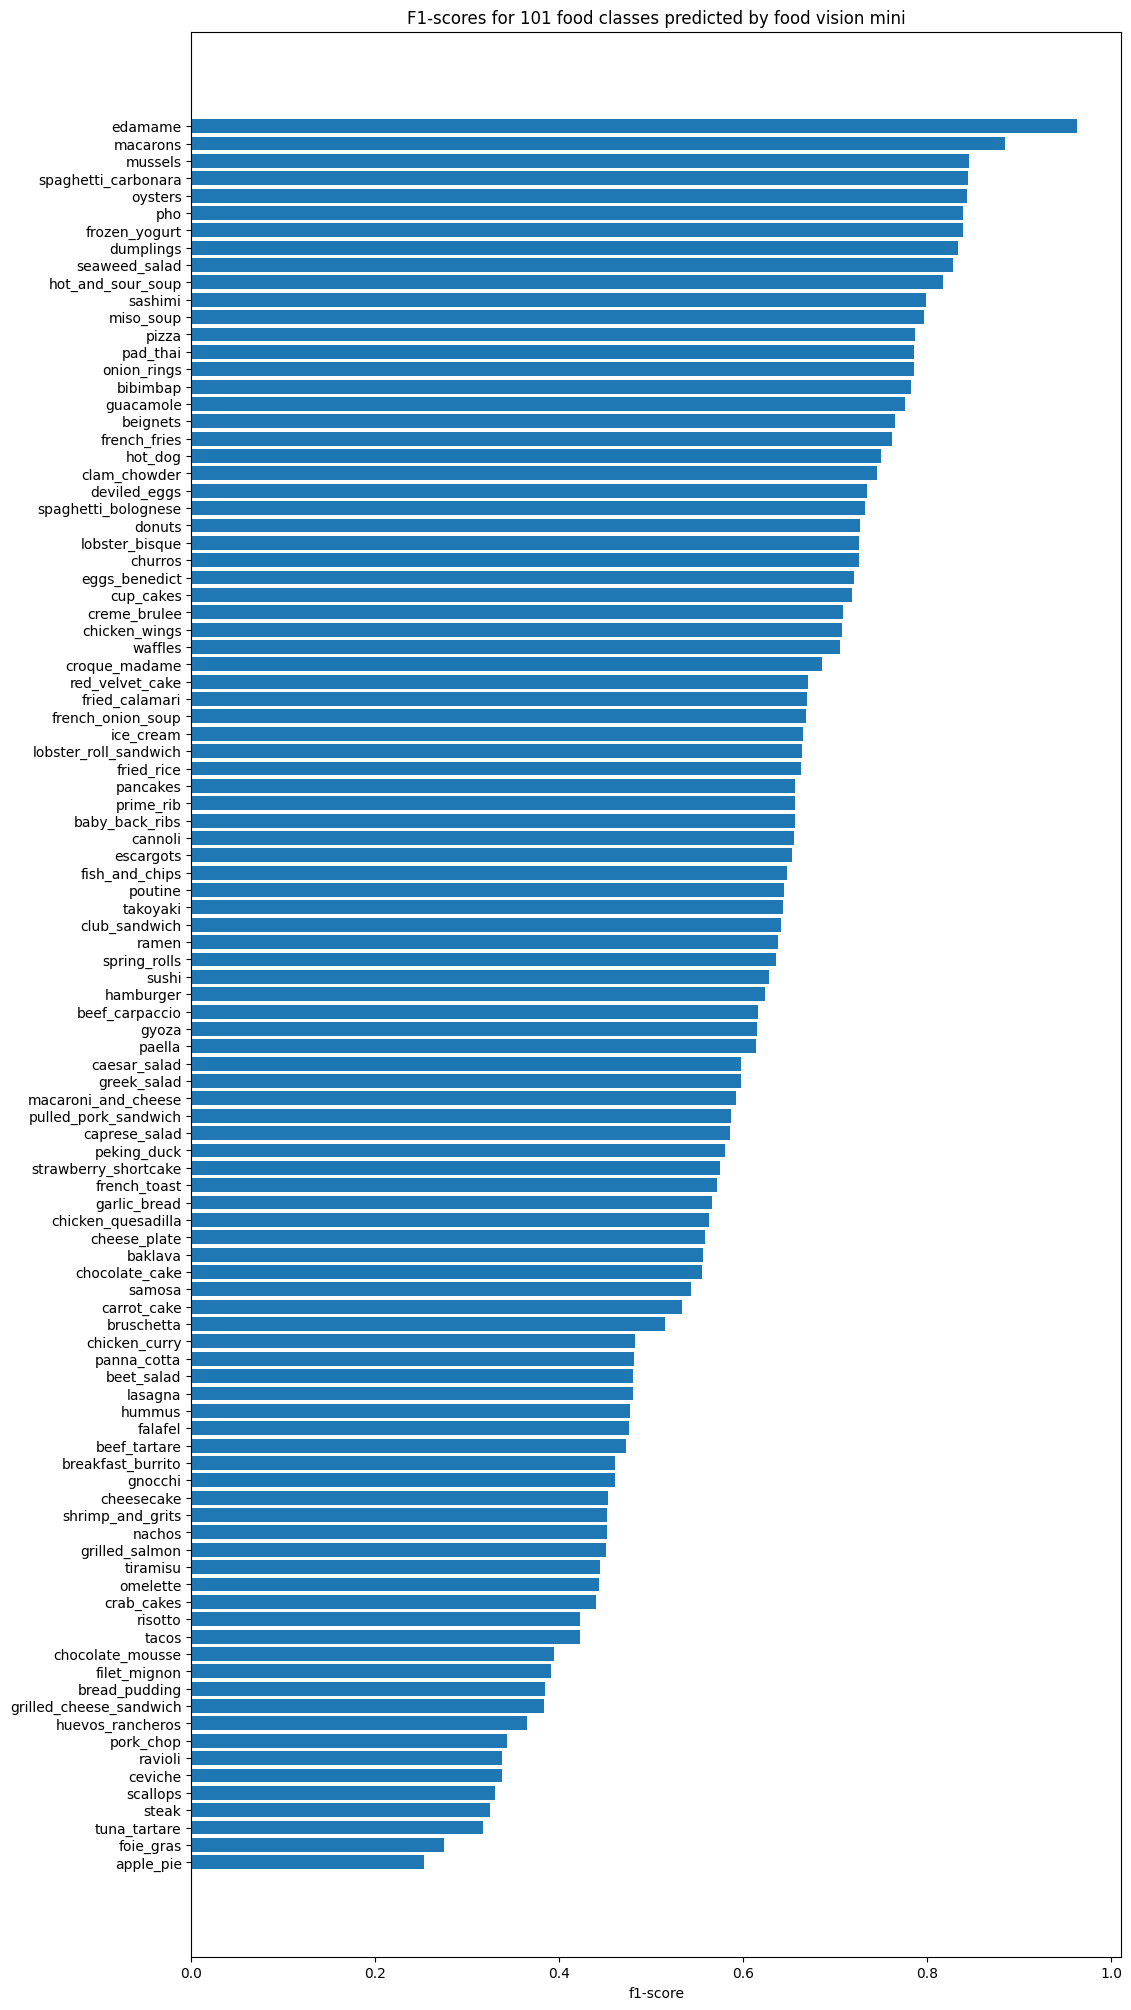

In [32]:
fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-scores"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores["class_names"])
ax.set_xlabel("f1-score")
ax.set_title("F1-scores for 101 food classes predicted by food vision mini")
ax.invert_yaxis()

## Visualizing predictions on the test image

In [33]:
def load_and_prep_image(file_name, img_shape=224, scale=True):

  img = tf.io.read_file(file_name)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.resize(img, size=[img_shape,img_shape])

  if scale:
    return img/255.
  else:
    return img


1/1 [==============================] - 0s 48ms/step


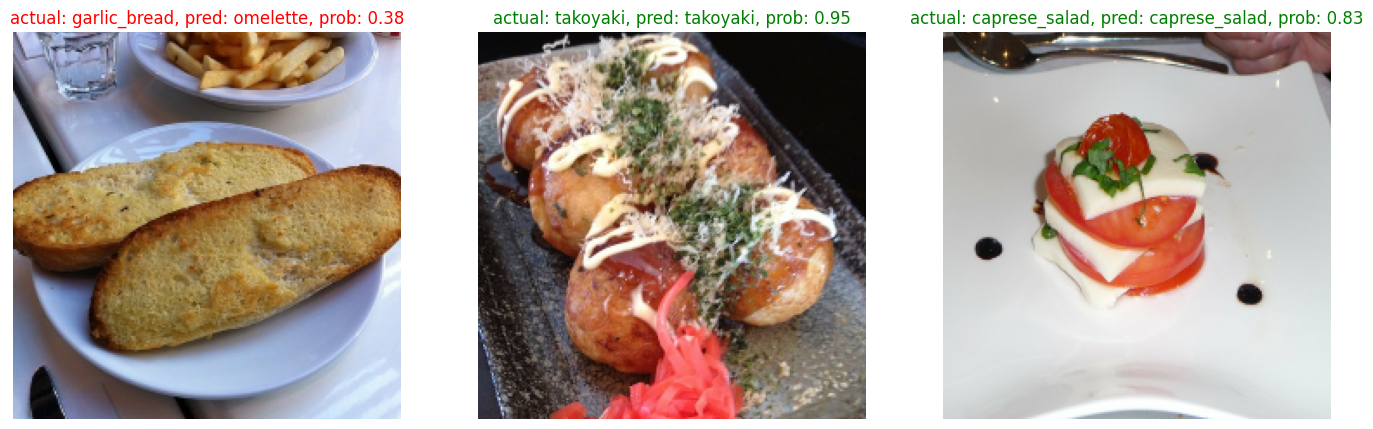

In [34]:
import os
import random

plt.figure(figsize=(17,10))
for i in range(3):
  class_name = random.choice(class_names)
  file_name = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + "/" + class_name + "/" + file_name

  img = load_and_prep_image(filepath, scale=False)
  pred_prob = loaded_model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred_prob.argmax()]

  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class:
    title_color = "g"
  else:
    title_color = "r"

  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False)

## Finding most wrong predictions

In [35]:
filepaths = []

for filepath in test_data.list_files("/content/101_food_classes_10_percent/test/*/*.jpg",
                               shuffle=False):
  filepaths.append(filepath.numpy())

filepaths[:10]

[b'/content/101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1113017.jpg']

In [40]:
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": true_classes,
                        "y_pred": pred_classes,
                        "pred_conf": pred_probs.max(axis=1),
                        "y_true_classname": [class_names[i] for i in true_classes],
                        "y_pred_classname": [class_names[i] for i in pred_classes]})

In [41]:
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

img_path  y_true  y_pred  \
0  b'/content/101_food_classes_10_percent/test/ap...       0      85   
1  b'/content/101_food_classes_10_percent/test/ap...       0       0   
2  b'/content/101_food_classes_10_percent/test/ap...       0       0   
3  b'/content/101_food_classes_10_percent/test/ap...       0       0   
4  b'/content/101_food_classes_10_percent/test/ap...       0       8   

   pred_conf y_true_classname y_pred_classname  pred_correct  
0   0.527256        apple_pie           samosa         False  
1   0.670648        apple_pie        apple_pie          True  
2   0.253523        apple_pie        apple_pie          True  
3   0.244210        apple_pie        apple_pie          True  
4   0.667663        apple_pie    bread_pudding         False

In [42]:
top_100_wrong = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending=False)
top_100_wrong.head(20)

img_path  y_true  y_pred  \
23797  b'/content/101_food_classes_10_percent/test/su...      95      86   
18001  b'/content/101_food_classes_10_percent/test/pa...      72      67   
14482  b'/content/101_food_classes_10_percent/test/hu...      57      51   
21400  b'/content/101_food_classes_10_percent/test/sa...      85      92   
4836   b'/content/101_food_classes_10_percent/test/ch...      19       9   
9690   b'/content/101_food_classes_10_percent/test/fi...      38      20   
9402   b'/content/101_food_classes_10_percent/test/fi...      37      79   
8612   b'/content/101_food_classes_10_percent/test/eg...      34      53   
22044  b'/content/101_food_classes_10_percent/test/se...      88       5   
5114   b'/content/101_food_classes_10_percent/test/ch...      20      38   
20191  b'/content/101_food_classes_10_percent/test/pu...      80       9   
20067  b'/content/101_food_classes_10_percent/test/pu...      80      53   
10880  b'/content/101_food_classes_10_percent/test/fr...      43      68   
18541  b'/content/101_food_classes_10_percent/test/pe...      74      85   
14375  b'/content/101_food_classes_10_percent/test/hu...      57      27   
17897  b'/content/101_food_classes_10_percent/test/pa...      71      65   
9090   b'/content/101_food_classes_10_percent/test/fa...      36      51   
11697  b'/content/101_food_classes_10_percent/test/ga...      46      35   
14542  b'/content/101_food_classes_10_percent/test/ic...      58      45   
9227   b'/content/101_food_classes_10_percent/test/fa...      36      26   

       pred_conf      y_true_classname   y_pred_classname  pred_correct  
23797   0.998087                 sushi            sashimi         False  
18001   0.998066              pancakes           omelette         False  
14482   0.997333                hummus          guacamole         False  
21400   0.994382                samosa       spring_rolls         False  
4836    0.993100    chicken_quesadilla  breakfast_burrito         False  
9690    0.992663        fish_and_chips      chicken_wings         False  
9402    0.990131          filet_mignon          prime_rib         False  
8612    0.989459         eggs_benedict          hamburger         False  
22044   0.988584         seaweed_salad         beet_salad         False  
5114    0.988232         chicken_wings     fish_and_chips         False  
20191   0.988216  pulled_pork_sandwich  breakfast_burrito         False  
20067   0.987325  pulled_pork_sandwich          hamburger         False  
10880   0.987066        fried_calamari        onion_rings         False  
18541   0.985755           peking_duck             samosa         False  
14375   0.985275                hummus       creme_brulee         False  
17897   0.984598                paella            mussels         False  
9090    0.984107               falafel          guacamole         False  
11697   0.983579          garlic_bread          escargots         False  
14542   0.982251             ice_cream      frozen_yogurt         False  
9227    0.982057               falafel         crab_cakes         False

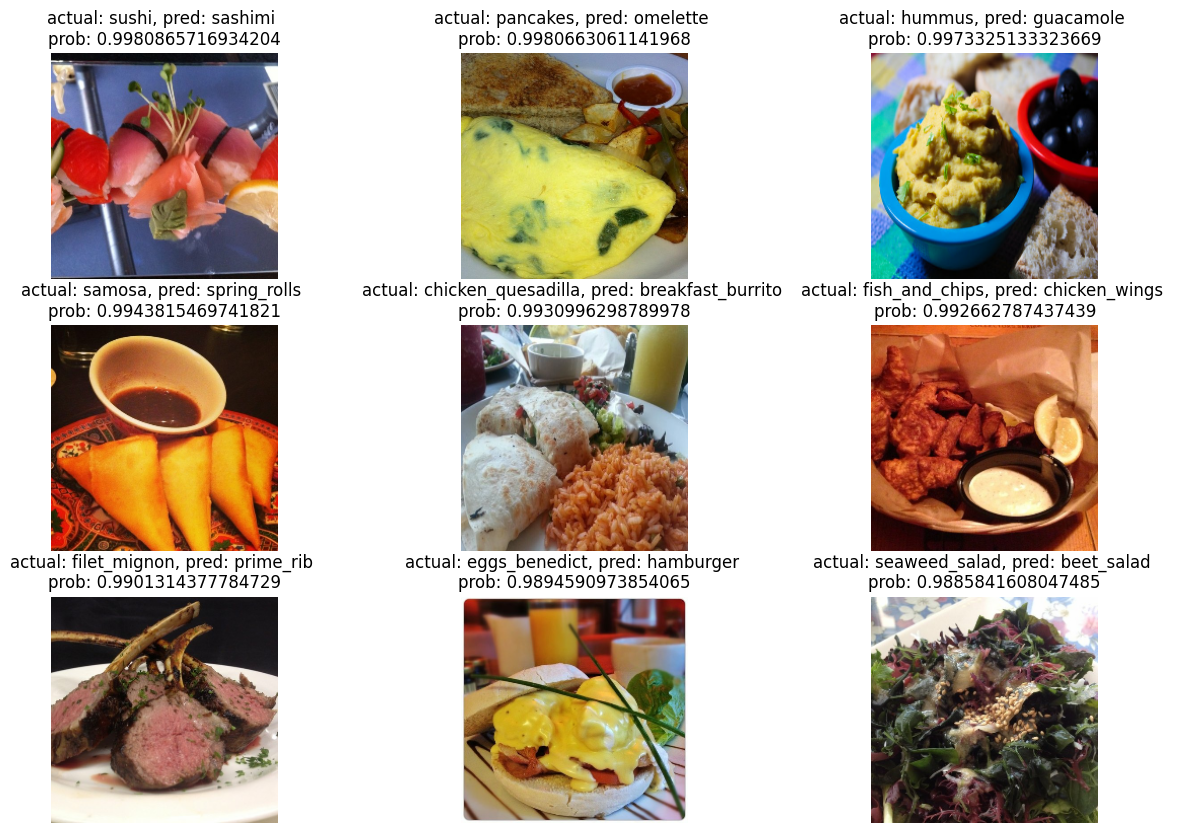

In [46]:
images_to_view = 9
start_index = 0
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
  plt.subplot(3, 3, i+1)
  img = load_and_prep_image(row[1], scale=False)
  _, _, _, _, pred_prob, y_true_classname, y_pred_classname, _ = row
  plt.imshow(img/255.)
  plt.title(f"actual: {y_true_classname}, pred: {y_pred_classname} \nprob: {pred_prob}")
  plt.axis(False)

## Making predictions on the custom images

--2024-03-05 03:38:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.207, 142.251.6.207, 172.217.212.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13192985 (13M) [application/zip]
Saving to: ‘custom_food_images.zip.1’

custom_food_images. 100%[===================>]  12.58M  72.3MB/s    in 0.2s    

2024-03-05 03:38:11 (72.3 MB/s) - ‘custom_food_images.zip.1’ saved [13192985/13192985]

1/1 [==============================] - 0s 46ms/step


prediction for hamburger.jpeg: hamburger


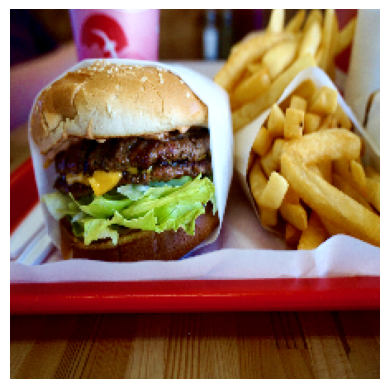

1/1 [==============================] - 0s 47ms/step


prediction for chicken_wings.jpeg: chicken_wings


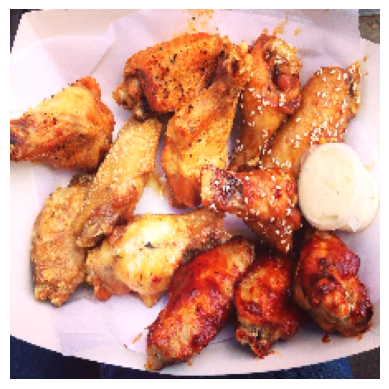

1/1 [==============================] - 0s 47ms/step


prediction for sushi.jpeg: sushi


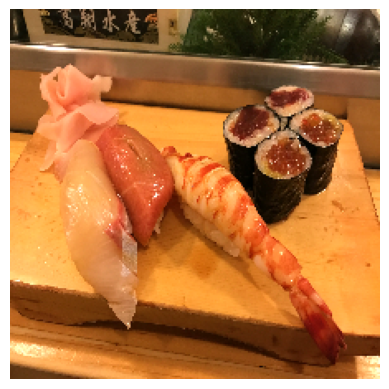

1/1 [==============================] - 0s 46ms/step


prediction for pizza-dad.jpeg: pizza


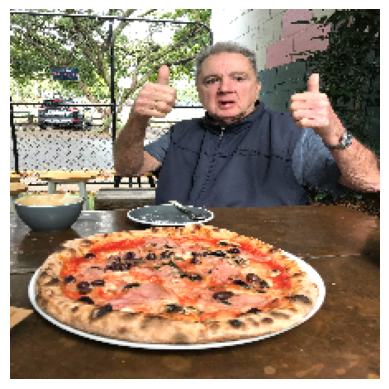

1/1 [==============================] - 0s 47ms/step


prediction for ramen.jpeg: chicken_curry


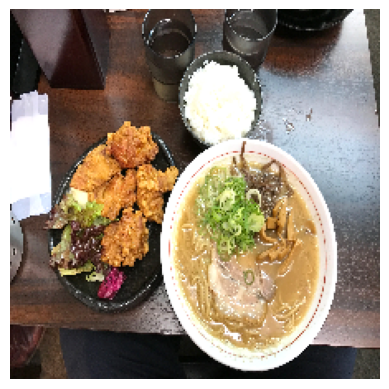

1/1 [==============================] - 0s 47ms/step


prediction for steak.jpeg: prime_rib


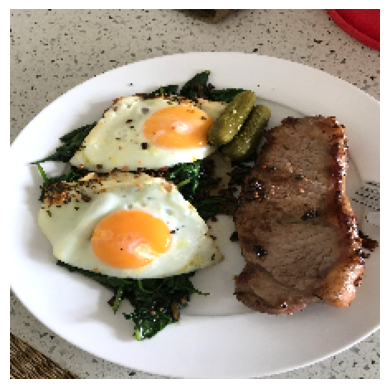

In [61]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip

unzip_data("custom_food_images.zip")

for file in os.listdir("custom_food_images"):
  img = load_and_prep_image("custom_food_images/" + file, scale=False)
  pred_prob = loaded_model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred_prob.argmax()]
  print(f"prediction for {file}: {pred_class}")
  plt.figure()
  plt.imshow(img/225.)
  plt.axis(False)
  plt.show()